<a href="https://colab.research.google.com/github/Kimgabe/AIFFEL_Online_Quest/blob/main/%5BPython_programming%5D/Person_set_profile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 프로필 정보 입력 클래스 : Profile

---

In [ ]:
# 프사 이미지 관련
from IPython.display import Image, display
import sys
import re

# DISP관련
import pandas as pd


class Profile:
    # 생성자
    def __init__(self):  # 추가로 들어갈 예정(name, age...)
        # 초기 속성 설정
        self.name = None  # 이름
        self.age = None   # 나이
        self.mbti = None  # MBTI
        self.profile_image = None  # 프로필 이미지
        self.recent_interest = None  # 최근 관심사
        self.career_interest = None  # 희망 진로
        self.field_of_interest = None  # 관심 분야
        self.hobbies = None  # 취미
        self.gender = None  # 성별
        self.residence = None # 지역
        self.marriage = None # 혼인
        self.guild = None # 길드
        self.nickname = None # 별명
        self.favorite_movies = []  # 좋아하는 영화 목록
        self.favorite_facilitator = '[퍼실]김정은/수원/힌튼😀'

        # 프로필 설정 및 출력
        self.set_profile()
        # self.set_others()
        self.display_info()

    # 프로필 정보(상위 메서드)
    def set_profile(self):
        self.profile_img()  # 프사 사진
        self.set_mbti()  # mbti
        self.set_others() # 나머지 프로필 정보 일괄 입력 받기
        self.set_interests()

        """
    set_profile의 하위 메서드들
    1. profile_img
    2. set_mbti
    3. set_others
        3-1. hobby 입력
        3-2. residence
        3-3. marriage
        3-4. guild
        3-5. gender
        3-6. age
        3-7. nickname
        3-8. favorite_facilitator
        3-9. favorite_movies
        3-10. set_interest
            3-10-1. recent_interests_info
            3-10-2. career_interests_info
            3-10-3. field_interests_info
            3-10-4. _get_interest_input : set_interest 하위 메서드
    """

        """
    1. 프로필 이미지
    """

    def profile_img(self):
        # 이미 프로필 이미지가 설정된 경우 메서드 실행 스킵
        if self.profile_image is not None:
            return

        print("당신의 프사를 업로드해주세요! 꼭 프사가 아니어도 좋아요!😀")

        """
    실행 환경에 따라 적절한 파일 선택 방식을 사용하는 메서드.
    Colab에서는 files.upload()를, 로컬 환경에서는 Tkinter filedialog를 사용.
    """
        # Colab 환경 체크
        if 'google.colab' in sys.modules:
            from google.colab import files
            uploaded = files.upload()

            # 업로드된 파일 중 이미지 파일(jpg, png) 찾기
            for filename in uploaded.keys():
                if filename.endswith('.jpg') or filename.endswith('.png'):
                    self.profile_image = filename
                    break
            else:
                print("이미지 파일(jpg, png)을 업로드해주세요.")

        else:
            # 로컬 환경에서 실행하는 경우
            from tkinter import Tk, filedialog

            root = Tk()
            root.withdraw()  # Tk 창 숨기기
            file_path = filedialog.askopenfilename(
                filetypes=[("Image files", "*.jpg *.png")])
            if file_path:
                self.profile_image = file_path
            else:
                print("이미지 파일(jpg, png)을 선택해주세요.")

        """
    2. MBTI 프로필 입력 받는 곳
    """

    def set_mbti(self):

        # 입력예시로 사용할 정보
        mbti_list = ['1. INTJ', '2. INTP', '3. ENTJ', '4. ENTP', '5. INFJ', '6. INFP',
                        '7. ENFJ', '8. ENFP', '9. ISTJ', '10. ISFJ', '11. ESTJ', '12. ESFJ', '13. ISTP', '14. ISFP', '15. ESTP', '16. ESFP']

        # 정보 출력
        mbti_dict = {str(i+1): mbti.split('. ')
                        [1] for i, mbti in enumerate(mbti_list)}
        output = [", ".join(mbti_list[i:i+4])
                    for i in range(0, len(mbti_list), 4)]
        output_string = "\n".join(output)

        # 정보 입력 받기
        while True:
            print(output_string)
            print('='*100, '\n')
            p_mbti = input(
                '당신의 MBTI는 무엇인가요?! 위 리스트를 보고 번호 또는 문자를 입력해주세요 :  ')

            if re.search("[가-힣]", p_mbti):
                print('MBTI는 영어로만 입력해주세요~! 다시 입력 부탁드립니다.')
                print('='*100, '\n')
                continue

            if p_mbti in mbti_dict:
                p_mbti = mbti_dict[p_mbti]
            else:
                p_mbti = p_mbti.upper()
                if p_mbti not in [mbti.split('. ')[1] for mbti in mbti_list]:
                    print("유형에 없는 MBTI네요. 다시 입력해주세요 :D")
                    print('-'*100, '\n')
                    continue

            break

        self.mbti = p_mbti  # 클래스의 mbti 속성 업데이트
        print(f'당신의 MBTI는 {self.mbti}군요! 만나서 반가워요!')
        print('='*100, '\n')

        """
    3. 기타 프로필 정보 일괄 입력 받기
    """

    def set_others(self):
      # arguments별 입력 코드


      self.name = input('당신의 이름을 입력해주세요~!')

      """
      3-1. 취미
      """
      # 취미 입력
      hobby_list = {1:'운동', 2:'요리',3:'음악',4:'여행',5:'독서',6:'기타'}
      hobby = ''
      while hobby == '':
        hobby = input("""당신의 취미를 숫자 혹은 문자로 입력하세요
    (1:\'운동\', 2:\'요리\',3:\'음악\',4:\'여행\',5:\'독서\',6:\'기타\'): """)

        if hobby == '':
          print('취미는 공백일 수 없습니다. 다시 입력하세요.')
        else:
          if hobby.isdigit():
            hobby = int(hobby)

            for k, v in hobby_list.items():
              if hobby == k or hobby == v:
                if hobby == 6 or hobby == '기타':
                  etc = ''
                  while etc.isdigit() == True or etc == '':
                    etc = input('리스트에 없는 취미를 가지고 계신다면 그 취미를 입력하세요. : ')
                    if etc.isdigit() == True or etc == '':
                      print('취미는 숫자나 공백이 될 수 없습니다.')
                    else:
                      self.hobbies = etc
                else:
                      self.hobbies = v


      """
      3-2. residence
      """
      # 지역 입력
      region = ''
      while region == '':
        region = input('사시는 지역을 입력해주세요. :')

        if region == '':
          print('사는 지역은 공백이 될 수 없습니다.')
      self.residence = region


      """
      3-3. marriage
      """
      # 혼인 여부 입력
      marry = ''
      while marry != 'T' or marry != 'F':
        marry = input('결혼 여부를 입력해주세요.(T/F)')

        if marry == 'T':
          self.marriage = '기혼'
          break
        elif marry == 'F':
          self.marriage = '미혼'
          break
        else:
          print('결혼 여부를 T 혹은 F로 입력해주세요.')

      """
      3-4. guild
      """
      # 길드 입력
      while self.guild != '응' and self.guild != '힌튼' and self.guild != '하사비스':
        self.guild = input('당신이 속해있는 길드를 입력해주세요.(응, 힌튼, 하사비스) : ')

        if self.guild != '응' and self.guild != '힌튼' and self.guild != '하사비스':
          print('아이펠 온라인 7기에 존재하지 않는 길드 입니다.')
        else:
          fasil = input(f'그렇다면 {self.guild}를 담당하시는 퍼실님의 성함을 입력해주세요. :')

          if self.guild == '응' and (fasil == '박광석' or fasil == '광석'):
            print(f'맞아요! {self.guild} 길드의 담당 퍼실님은 {fasil}님이에요:)')
          elif self.guild == '힌튼' and (fasil == '김정은' or fasil == '정은'):
            print(f'맞아요! {self.guild} 길드의 담당 퍼실님은 {fasil}님이에요:)')
          elif self.guild == '하사비스' and (fasil == '이영빈' or fasil == '영빈'):
            print(f'맞아요! {self.guild} 길드의 담당 퍼실님은 {fasil}님이에요:)')
          else:
            print('우리 길드에 그런 퍼실님은 안 계세요...')

      """
      3-5. gender
      """
      # 성별 입력
      gd = ''
      while gd == '' or gd.isdigit() == True:
        gd = input('성별을 입력해주세요. : ')
        if gd == '' or gd.isdigit() == True:
          print('성별은 필수 입력 값이며, 숫자일 수 없습니다. 다시 입력해주세요.')
        elif gd == '중성':
          print('이 세상에 중성인 사람이 있을까요?')
        else:
          self.gender = gd

      """
      3-6. age
      """
      # 나이 입력
      import datetime
      d = datetime.datetime.now()
      try:
        age_input = input('나이가 어떻게 되세요? 만 나이 혹은 태어난 년도로 말해주세요.^^ :')
        self.age = float(age_input)

        # 나이숫자별 오입력에 대한 처리
        if len(age_input) == 2:
          print(f'만 {int(self.age)}세이시군요. 생일이 지나시면 {int(self.age) + 1}세가 되시겠네요~')

        elif len(age_input) == 4:
          print(f'{int(self.age)}년에 태어나셨군요. 동안이시네요!')
          self.age = d.year - int(self.age)
          print(f'만 {int(self.age)}세이시군요. 생일이 지나시면 {int(self.age) + 1}세가 되시겠네요~')

        elif self.age <= 0:
          print('앞에 \'-\'가 붙었어요! 우리 나이는 자연수인 거 아시죠? ^^')

        # 숫자 개수 입력 에러 처리
      except ValueError:
        print(f'숫자를 {len(age_input)} 개 입력하셨어요. 나이나 태어나신 연도 4자리를 입력해주세요!')

      # 예상치 못한 에러의 경우
      except Exception as e:
        print(f'알 수 없는 오류가 발생했습니다. {e}')

      # 최종 self에 전달할때
      self.age = str(int(self.age)) #로 입력 32.0 -> 32 -> '32'

      """
      3-7. nickname
      """
      # 별명 입력
      nick = ''
      nick_reason = ''
      nick_dic = {}
      while nick.isdigit() == True or nick == '':
        nick = input('당신의 별명은 무엇인가요? ')

        if nick.isdigit() == True or nick == '':
          print('문자로 입력해주세요.')
        else:
          while nick_reason.isdigit() == True or nick_reason == '':
            nick_reason = input(f'당신의 별명이 {nick}인 이유도 알 수 있을까요? ')

            if nick_reason.isdigit() == True or nick_reason == '':
              print('문자로 입력해주세요.')
            else:
              nick_dic.setdefault(nick, nick_reason)
              self.nickname = nick_dic

      """
      3-8. favorite_facilitator
      """
      while True:
          # 좋아하는 퍼실 입력 받기
          facilitator_input = input(
              'AIFFEL에서 당신이 가장 좋아하는 퍼실님은 누군가요?!(당신의 센스를 믿습니다.😂)')

          # 정은 퍼실님 아닐경우 드립 1번..
          if '정은' not in facilitator_input:
              print("정말이세요?! 전 여전히 당신의 센스를 믿어요(?!) 다시 한번만 생각해 보시죠?! 😒")
              second_chance = input("다시 한 번 '자알~'생각해 볼까요? 우리.. 코어잖아요...? : ")

              # 두번째도 입력
              # 정은 퍼실님 입력한 경우 그대로 favorite_facilitator로 입력
              if '정은' in second_chance:
                  self.favorite_facilitator = second_chance
                  break
              # 아닌 경우도 다른 입력값 그대로 favorite_facilitator로 설정
              else:
                  print(f"{self.name}님, 님 T에요...? 눈치 챙겨..")
                  break
          # 처음부터 정은 퍼실님 입력한 경우 그대로 favorite_facilitator로 설정
          else:
              break

      # 일부러 list에 append안합니다! 어차피 고정값 출력 예정

      """
      3-7. favorite_movies
      """
      # MBTI 유형별 영화 정보 추천 위한 데이터
      mbti_movie_preferences = {
          "ISTJ": {"세상소금형", "역사", "사극"},
          "ISFJ": {"임금 뒤 권력형", "교육", "문화"},
          "INTJ": {"과학자형", "미스터리"},
          "INFJ": {"예언자형", "드라마", "연속극"},
          "ISTP": {"백과사전형", "사회풍자적 메시지가 있는"},
          "ISFP": {"성인군자형", "애니메이션", "만화"},
          "INFP": {"잔다르크형", "판타지"},
          "INTP": {"아이디어 뱅크형", "과학"},
          "ESTP": {"수완 좋은 활동가형", "액션"},
          "ESFP": {"사교적 유형", "뮤지컬"},
          "ENFP": {"스파크형", "어드밴처"},
          "ENTP": {"발명가형", "블랙 코미디"},
          "ESTJ": {"사업가형", "법정드라마"},
          "ESFJ": {"친목도모형", "하이틴", "우정"},
          "ENFJ": {"언변 능숙형", "로맨스 코미디"},
          "ENTJ": {"지도자형", "스릴러", "공포"}
      }

      # 입력받은 MBTI 유형에 따른 영화 장르 추천 문구 작성 및 input 받기
      if self.mbti in mbti_movie_preferences:
          # 입력받은 mbti로 key선택
          mbti_info = mbti_movie_preferences[self.mbti]
          mbti_type = mbti_info.pop()  # mbti유형별 설명 추출
          genres = ", ".join(mbti_info)  # 장르들 문자열로 전환 후 ','로 이어 붙이기

          # 유형별 선호 장르 출력 문구 설정
          print(
              f"보통 {self.mbti}는 '{mbti_type} 유형으로 {genres} 장르를 좋아한다고 합니다.")

          # 정보 input 요구
          self.favorite_movies.append(
              input(f"{mbti_type} 유형인 당신! 당신의 인생영화는 무엇인가요? : "))

      """
      3-10. set_interests
      """

    # interest 관련 항목들 입력받을때 출력되고 정보 입력받는 공통 메서드
    def set_interests(self):

        # 각 항목별 관심사 목록
        recent_interests_info = [
            '1. 데이터 과학', '2. 인공지능', '3. 클라우드 컴퓨팅', '4. 사이버 보안', '5. 기타']
        career_interests_info = [
            '1. 데이터 분석가', '2. 머신러닝 엔지니어', '3. 데이터 엔지니어', '4. AI 연구원', '5. 창업']
        field_interests_info = [
            '1. 머신러닝', '2. 딥러닝', '3. 컴퓨터 비전', '4. 자연어 처리', '5. 로봇공학']

        """
        3-10-1. 최근관심사
        """
        # 최근 관심사 입력
        self.recent_interest = self._get_interest_input(
            recent_interests_info, "최근 관심사를 선택하세요: ")

        # 관심 진로 입력
        self.career_interest = self._get_interest_input(
            career_interests_info, "관심 진로를 선택하세요: ")

        # 관심 분야 입력
        self.field_of_interest = self._get_interest_input(
            field_interests_info, "AI 관련 관심 분야를 선택하세요: ")

    """
    3-10-4. _get_interest_input
    """
    def _get_interest_input(self, interests_info, prompt):
        while True:
            print("\n".join(interests_info)) # 주석여기다
            print("0. 직접 입력하기")
            choice = input(f"{prompt} (또는 직접 입력하고 싶다면 0번을 입력해주세요): ")

            if choice == '0':
                return input('관심사를 입력해주세요: ')
            elif choice.isdigit() and 1 <= int(choice) <= len(interests_info):
                # ex) '1. 데이터 과학' 에서 텍스트만 분리
                return interests_info[int(choice)-1].split('. ')[1]
            else:
                print('올바른 번호를 선택해주세요.')
                continue

    """
    3-11. 입력받은 프로필 정보 출력
    """
    # 프로필 출력 by dataframe

    def display_info(self):

        # 프로필 이미지 출력
        if hasattr(self, 'profile_image') and self.profile_image:
            display(Image(filename=self.profile_image))
        else:
            print("프로필 이미지가 설정되지 않았습니다.")

        # 프로필 정보를 DataFrame으로 생성
        profile_data = {
            '항목': ['이름', '나이', '성별', '취미', 'MBTI', '인생영화', '좋아하는 퍼실', '최근관심사', '관심커리어','관심AI분야'],
            '정보': [getattr(self, 'name', '정보 없음'),
                    getattr(self, 'age', '정보 없음'),
                    getattr(self, 'gender', '정보 없음'),
                    getattr(self, 'hobbies', '정보 없음'),
                    getattr(self, 'mbti', '정보 없음'),
                    getattr(self, 'favorite_movies', '정보 없음'),
                    self.favorite_facilitator,
                    getattr(self, 'recent_interest', '정보 없음'),
                    getattr(self, 'career_interest', '정보 없음'),
                    getattr(self, 'field_of_interest', '정보 없음'),
                   ]
        }
        profile_df = pd.DataFrame(profile_data)

        # 프로필 정보 출력
        display(profile_df)

## 루틴 정보 입력 클래스 - Routine

In [ ]:
import time

class Routine:
    def __init__(self):
        self.routine = {"아침": {}, "점심": {}, "저녁": {}}
        self.daily_routine()

    def daily_routine(self):
        time_of_day_names = ["아침", "점심", "저녁"]

        print("아침, 점심, 저녁의 일과를 순서대로 입력할게요!\n")

        for time_of_day_name in time_of_day_names:
            time.sleep(1)
            print(f"\n{time_of_day_name} 시간의 루틴을 입력합니다.\n")

            categories = {
                1: {"name": "일상", "description": "일상적인 활동을 포함한 루틴 - 식사, 청소, 요리 등"},
                2: {"name": "업무", "description": "경제활동"},
                3: {"name": "학업", "description": "학문적인 활동 및 아이펠 노드 예습/복습"},
                4: {
                    "name": "취미활동 및 자기계발",
                    "description": (
                        "\n-운동(러닝, 요가, 헬스, 등산...)\n"
                        "-문화활동(독서, 영화, 음악, 연극 감상, 맛집투어...)\n"
                        "-창작활동(글쓰기, 영상제작(유튜브), 요리, 뜨개질...)\n"
                        "-기타(가드닝...)"
                    ),
                }
            }

            while True:
                time.sleep(1)
                print("\n카테고리별로 일과를 입력할 수 있습니다\n")

                for key, value in categories.items():
                    time.sleep(0.5)
                    print(f"{key}. {value['name']}: {value['description']}")

                time.sleep(1)

                category_choice = int(input("\n작성하고 싶은 일과에 해당하는 번호를 입력하세요 : \n"))

                if category_choice not in categories:
                    print("올바른 카테고리 번호를 입력하세요.")
                    continue

                category_name = categories[category_choice]["name"]
                details = input("\n작성하고 싶은 내용을 입력하세요: ")

                if category_name not in self.routine[time_of_day_name]:
                    self.routine[time_of_day_name][category_name] = [details]
                else:
                    self.routine[time_of_day_name][category_name].append(details)

                add_more = input("\n계속해서 루틴을 입력하시겠습니까? (네 / 아니요): \n")

                # "네" 입력 시에만 계속 입력을 받도록 수정
                if add_more.lower() != '네':
                    break

        print("\n일과 입력을 마칩니다!")

    def print_routine(self):
        print("\n현재 루틴 정보:")
        for time_of_day_name, details in self.routine.items():
            print(f"\n{time_of_day_name} 시간의 루틴:")
            for category, activities in details.items():
                print(f"{category}: {', '.join(activities)}")

## 프로필 입력 받고 하루 일과를 출력하는 클래스 : Person
### 두개의 클래스(Profile, Routin)의 기능화 정보를 승계받은 child class

- 프로필 정보와, 루틴 정보를 한번에 입력받아 그 결과를 가공하여 출력하는 메서드 추가

In [ ]:
class PrintInfo(Profile, Routine):
    def __init__(self):
        Profile.__init__(self)
        Routine.__init__(self)
        self.print_all_info() # 출력메서드 바로 실행하기

    def print_all_info(self):
        # Profile 클래스의 정보 출력
        self.display_info()
        # Routine 클래스의 정보 출력
        self.print_routine()

당신의 프사를 업로드해주세요! 꼭 프사가 아니어도 좋아요!😀


Saving KakaoTalk_20231103_090830079.jpg to KakaoTalk_20231103_090830079 (30).jpg
1. INTJ, 2. INTP, 3. ENTJ, 4. ENTP
5. INFJ, 6. INFP, 7. ENFJ, 8. ENFP
9. ISTJ, 10. ISFJ, 11. ESTJ, 12. ESFJ
13. ISTP, 14. ISFP, 15. ESTP, 16. ESFP

당신의 MBTI는 무엇인가요?! 위 리스트를 보고 번호 또는 문자를 입력해주세요 :  3
당신의 MBTI는 ENTJ군요! 만나서 반가워요!

당신의 이름을 입력해주세요~!승순
당신의 취미를 숫자 혹은 문자로 입력하세요
    (1:'운동', 2:'요리',3:'음악',4:'여행',5:'독서',6:'기타'): 3
사시는 지역을 입력해주세요. :서울
결혼 여부를 입력해주세요.(T/F)F
당신이 속해있는 길드를 입력해주세요.(응, 힌튼, 하사비스) : 하사비스
그렇다면 하사비스를 담당하시는 퍼실님의 성함을 입력해주세요. :영빈
맞아요! 하사비스 길드의 담당 퍼실님은 영빈님이에요:)
성별을 입력해주세요. : 남자
나이가 어떻게 되세요? 만 나이 혹은 태어난 년도로 말해주세요.^^ :35
만 35세이시군요. 생일이 지나시면 36세가 되시겠네요~
당신의 별명은 무엇인가요? 하사비스
당신의 별명이 하사비스인 이유도 알 수 있을까요? 길드원이라
AIFFEL에서 당신이 가장 좋아하는 퍼실님은 누군가요?!(당신의 센스를 믿습니다.😂)영빈
정말이세요?! 전 여전히 당신의 센스를 믿어요(?!) 다시 한번만 생각해 보시죠?! 😒
다시 한 번 '자알~'생각해 볼까요? 우리.. 코어잖아요...? : 영빈
승순님, 님 T에요...? 눈치 챙겨..
보통 ENTJ는 '스릴러 유형으로 지도자형, 공포 장르를 좋아한다고 합니다.
스릴러 유형인 당신! 당신의 인생영화는 무엇인가요? : 쏘우
1. 데이터 과학
2. 인공지능
3. 클라우드 컴퓨팅
4. 사이버 보안
5. 기타
0. 직접 입력하기
최근 

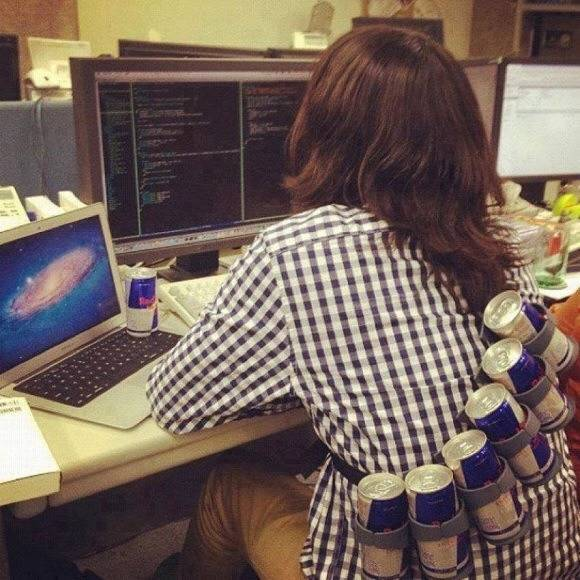

,항목,정보
0,이름,승순
1,나이,35
2,성별,남자
3,취미,음악
4,MBTI,ENTJ
5,인생영화,[쏘우]
6,좋아하는 퍼실,[퍼실]김정은/수원/힌튼😀
7,최근관심사,클라우드 컴퓨팅
8,관심커리어,머신러닝 엔지니어
9,관심AI분야,컴퓨터 비전


아침, 점심, 저녁의 일과를 순서대로 입력할게요!


아침 시간의 루틴을 입력합니다.


카테고리별로 일과를 입력할 수 있습니다

1. 일상: 일상적인 활동을 포함한 루틴 - 식사, 청소, 요리 등
2. 업무: 경제활동
3. 학업: 학문적인 활동 및 아이펠 노드 예습/복습
4. 취미활동 및 자기계발: 
-운동(러닝, 요가, 헬스, 등산...)
-문화활동(독서, 영화, 음악, 연극 감상, 맛집투어...)
-창작활동(글쓰기, 영상제작(유튜브), 요리, 뜨개질...)
-기타(가드닝...)

작성하고 싶은 일과에 해당하는 번호를 입력하세요 : 
1

작성하고 싶은 내용을 입력하세요: 식사

계속해서 루틴을 입력하시겠습니까? (네 / 아니요): 
네

카테고리별로 일과를 입력할 수 있습니다

1. 일상: 일상적인 활동을 포함한 루틴 - 식사, 청소, 요리 등
2. 업무: 경제활동
3. 학업: 학문적인 활동 및 아이펠 노드 예습/복습
4. 취미활동 및 자기계발: 
-운동(러닝, 요가, 헬스, 등산...)
-문화활동(독서, 영화, 음악, 연극 감상, 맛집투어...)
-창작활동(글쓰기, 영상제작(유튜브), 요리, 뜨개질...)
-기타(가드닝...)

작성하고 싶은 일과에 해당하는 번호를 입력하세요 : 
3

작성하고 싶은 내용을 입력하세요: 아이펠 노드 복습

계속해서 루틴을 입력하시겠습니까? (네 / 아니요): 
아니요

점심 시간의 루틴을 입력합니다.


카테고리별로 일과를 입력할 수 있습니다

1. 일상: 일상적인 활동을 포함한 루틴 - 식사, 청소, 요리 등
2. 업무: 경제활동
3. 학업: 학문적인 활동 및 아이펠 노드 예습/복습
4. 취미활동 및 자기계발: 
-운동(러닝, 요가, 헬스, 등산...)
-문화활동(독서, 영화, 음악, 연극 감상, 맛집투어...)
-창작활동(글쓰기, 영상제작(유튜브), 요리, 뜨개질...)
-기타(가드닝...)

작성하고 싶은 일과에 해당하는 번호를 입력하세요 : 
1

작성하고 싶은 내용을 입력하세요: 점심식사

계속해서 루틴을 입력

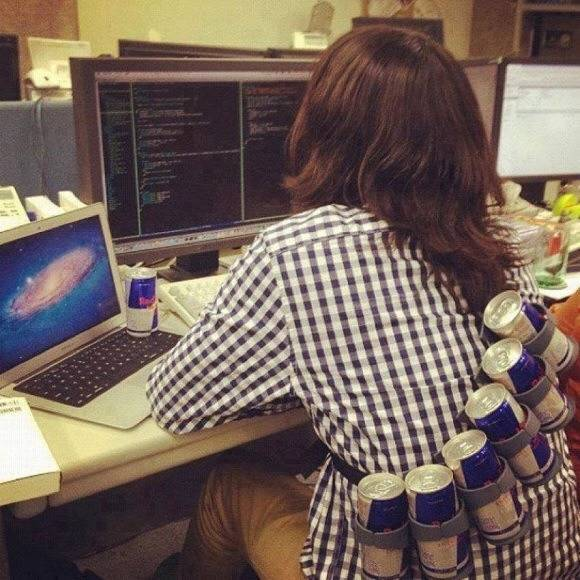

,항목,정보
0,이름,승순
1,나이,35
2,성별,남자
3,취미,음악
4,MBTI,ENTJ
5,인생영화,[쏘우]
6,좋아하는 퍼실,[퍼실]김정은/수원/힌튼😀
7,최근관심사,클라우드 컴퓨팅
8,관심커리어,머신러닝 엔지니어
9,관심AI분야,컴퓨터 비전



현재 루틴 정보:

아침 시간의 루틴:
일상: 식사
학업: 아이펠 노드 복습

점심 시간의 루틴:
일상: 점심식사

저녁 시간의 루틴:
일상: 저녁식사
취미활동 및 자기계발: 런닝


In [ ]:
info = PrintInfo()